In [41]:
%cd D:\Pulpit\code\SudokuDeepNET
import torch
from torch.utils.data import DataLoader, random_split
from dataloader import SudokuDataset
from model import SudokuNet
from pipeline import ModelFit

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import seaborn as sns


D:\Pulpit\code\SudokuDeepNET


d:\Pulpit\code\SudokuDeepNET\suenv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [42]:
full_dataset = SudokuDataset("DataGeneration/data/data2.pt")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )
print(f"Using device: {device}")
model = SudokuNet().to(device)


train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_ds, val_ds, test_ds = random_split(full_dataset, [train_size, val_size, test_size])
workers_num =5
        # Loaders
pin_memory_state = False
train_loader = DataLoader(train_ds, batch_size=256, shuffle=True,pin_memory=pin_memory_state, num_workers=workers_num)
val_loader   = DataLoader(val_ds, batch_size=512, shuffle=False,pin_memory=pin_memory_state, num_workers=workers_num)
test_loader  = DataLoader(test_ds, batch_size=256, shuffle=False,pin_memory=pin_memory_state, num_workers=workers_num)



Using device: cpu


In [43]:



model = SudokuNet()

        # Create trainer and get components
trainer = ModelFit()
model, optimizer, loss_func = trainer.get_model(
            learning_rate=1e-3, 
            model=model
        )

        # Train (using the returned optimizer and loss_func)
trainer.model_training(
            epoches=1,
            loss_func=loss_func,
            optimalizator=optimizer,  # Use the one returned by get_model
            training_data=train_loader,
            validation_data=val_loader,
            weight_unfreeze_epoch=None,
            scheduler_step_size=5,
            scheduler_gamma=0.5)
        


Epoch 1/1: 100%|██████████| 3125/3125 [16:13<00:00,  3.21it/s, train_loss=0.628]


Model saved: runs/real_data/SudokuNet_19_39_S-29-39-2025\model.pt


SudokuNet(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (classification_layer): Sequential(
    (0): Conv2d(256, 9, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [44]:
test_ds.__getitem__(1)

(tensor([[[5., 7., 4., 8., 5., 0., 6., 1., 9.],
          [6., 9., 2., 2., 7., 6., 8., 3., 0.],
          [1., 8., 3., 4., 1., 9., 0., 2., 0.],
          [5., 6., 0., 5., 4., 8., 8., 3., 9.],
          [0., 2., 9., 1., 2., 9., 0., 0., 0.],
          [4., 0., 8., 6., 7., 0., 4., 0., 7.],
          [9., 2., 4., 6., 9., 3., 0., 8., 7.],
          [0., 7., 1., 5., 0., 4., 4., 0., 1.],
          [3., 5., 6., 1., 0., 8., 5., 0., 6.]]]),
 tensor([[4, 6, 3, 7, 4, 2, 5, 0, 8],
         [5, 8, 1, 1, 6, 5, 7, 2, 3],
         [0, 7, 2, 3, 0, 8, 6, 1, 4],
         [4, 5, 0, 4, 3, 7, 7, 2, 8],
         [2, 1, 8, 0, 1, 8, 0, 1, 4],
         [3, 6, 7, 5, 6, 2, 3, 5, 6],
         [8, 1, 3, 5, 8, 2, 1, 7, 6],
         [7, 6, 0, 4, 1, 3, 3, 8, 0],
         [2, 4, 5, 0, 6, 7, 4, 2, 5]]))

In [45]:
trainer.model_testing(test_loader,loss_func,class_names=9)


Test Loss: 0.5324
Test Accuracy: 5952.98%


ValueError: unknown is not supported

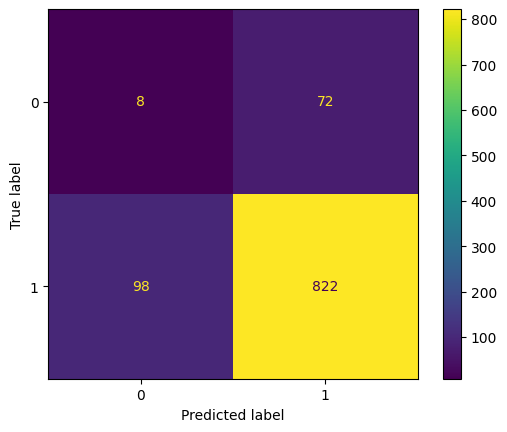

In [38]:
actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [36]:
model = SudokuNet()
ModelFit()

In [40]:
import logging, os

log_path = "logs/train.log"
os.makedirs(os.path.dirname(log_path), exist_ok=True)

logging.basicConfig(
    filename=log_path,
    filemode="a",
    format="%(asctime)s - %(levelname)s - %(message)s",
    level=logging.INFO
)

logs = logging.getLogger("sudoku_trainer")
logs.info("Logging initialized")